<a href="https://colab.research.google.com/github/elvoza/Curso-Introductorio-a-Python/blob/main/Sesi%C3%B3n_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="120px" src="https://www.udea.edu.co/wps/wcm/connect/udea/df55724e-3ebc-46c6-b608-fb9206b3fede/facultad-economicas.png?MOD=AJPERES&CVID=nc5zPyj" align="Center" hspace="10px" vspace="10px"></p>


#***Python I - Introducción a modelos económicos y financieros con Python***

---


#**Sesión 8**
# Docente: *Cristian Ruiz Parra*


# **Curso Intensivo de Series de Tiempo en Python (3 horas)**

1.1 Introducción a las Series de Tiempo

¿Que es un **Pronostico**?
¿Para qué se hacen pronosticos?
Ejemplos de pronosticos y sus ventajas

◮ Planeacion y Control de Operaciones. Por ejemplo, las decisiones de produccion de un artíıculo con base en los pronosticos de ventas.

◮ En Mercadeo la decision de invertir en publicidad puededepender de pronosticos de ventas.

◮ En Planeacion. Los pronosticos de gastos sirven para definir los presupuestos futuros.

◮ En Planeacion. El pronostico de consumo deenergía electrica domiciliaria es fundamental para las decisiones de generacion.

◮ En Turismo. El pronosticos de número de turistas mensuales para determinar la demanda hotelera

## **Elementos a tener en cuenta para hacer un pronostico**

◮ PERIODO DE PREDICCION: Es la unidad basica de tiempo para la cual el pronostico es hecho (semana, mes etc).

◮ HORIZONTE DE PREDICCION: Es el número de periodos en el futuro cubierto por el pronostico.

◮ INTERVALO DE PREDICCION: Es la frecuencia con la cual nuevas predicciones son preparadas (puede ser igual al periodo de prediccion).

**NOTA**
El pronostico es menos preciso cuando crece el horizonte de pronostico.

# **METODOS DE PRONOSTICO**
Pueden clasificarse en CUALITATIVOS o CUANTITATIVOS.

◮ Procedimientos cualitativos: Estimacion sujetiva (opinion de expertos).

◮ Procedimientos cuantitativos: La logica es claramente establecida, las operaciones son matematicas. Examinacion de datos historicos para determinar el proceso subyacente que
genera la variable y asume que el proceso es estable y usa estos conocimientos para extrapolar el proceso en el futuro.

En el modelo cuantitativo dos tipos basicos son usados: modelos de series de tiempo y modelos casuales.

# **Serie de tiempo**
Es una secuencia de observaciones de tiempo ordenada (realizaciones de una variable). El analisis de series de tiempo usa
solo la historia de las series de tiempo de la variable con el objetivo
de desarrollar un modelo para predecir valores futuros.

# **Modelos Casuales**

Explora las relaciones entre las serie de tiempo de interes y una o mas series de tiempo. Si existe algún tipo de correlacion entre las
variables y una causa para ello, un modelo estadíıstico puede ser
construido.

Conociendo valores de las variables correlacionadas puede usarse el modelo para obtener un pronostico de la variable dependiente.

# **LOS MODELOS CASUALES PRESENTAN DOS LIMITACIONES:**

◮ Las variables independientes deben conocerse en el momento de que el pronostico es hecho.

◮ Gran cantidad de computo y el manejo de datos en comparacion con ciertas formas de modelos de series de tiempo.

# **SERIES DE TIEMPO**

Una serie de tiempo es una secuencia de observaciones sobre una variable de interes.

◮ La variable es observada en puntos discretos de tiempo, la mayoríıa de las veces, igualmente espaciados.

◮ El analisis de series de tiempo involucra la descripcion del proceso o fenomeno que genera la secuencia.

◮ Para el pronostico de series de tiempo es necesario representar el comportamiento del proceso por un modelo matematico que
puede ser extendido al futuro.

◮ Una vez el modelo ha sido establecido una tecnica apropiada de pronostico puede ser desarrollada.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

# Configuración
plt.style.use('seaborn-v0_8')
np.random.seed(42)

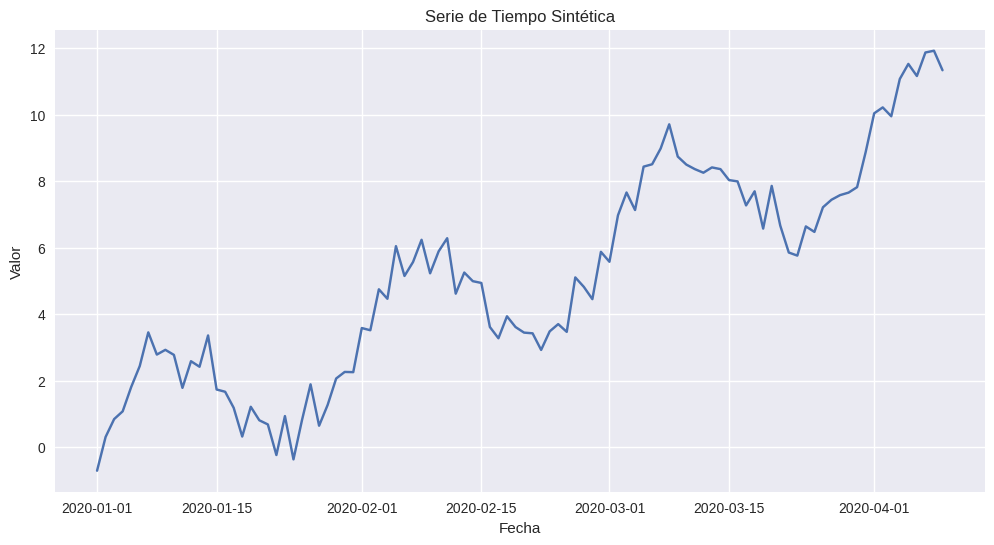

In [ ]:
# Crear una serie de tiempo sintética
dates = pd.date_range('2020-01-01', periods=100, freq='D')
trend = np.linspace(0, 10, 100)
seasonal = 2 * np.sin(2 * np.pi * np.arange(100) / 30)
noise = np.random.normal(0, 0.5, 100)

ts_data = trend + seasonal + noise
ts = pd.Series(ts_data, index=dates)

# Visualizar
plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title('Serie de Tiempo Sintética')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

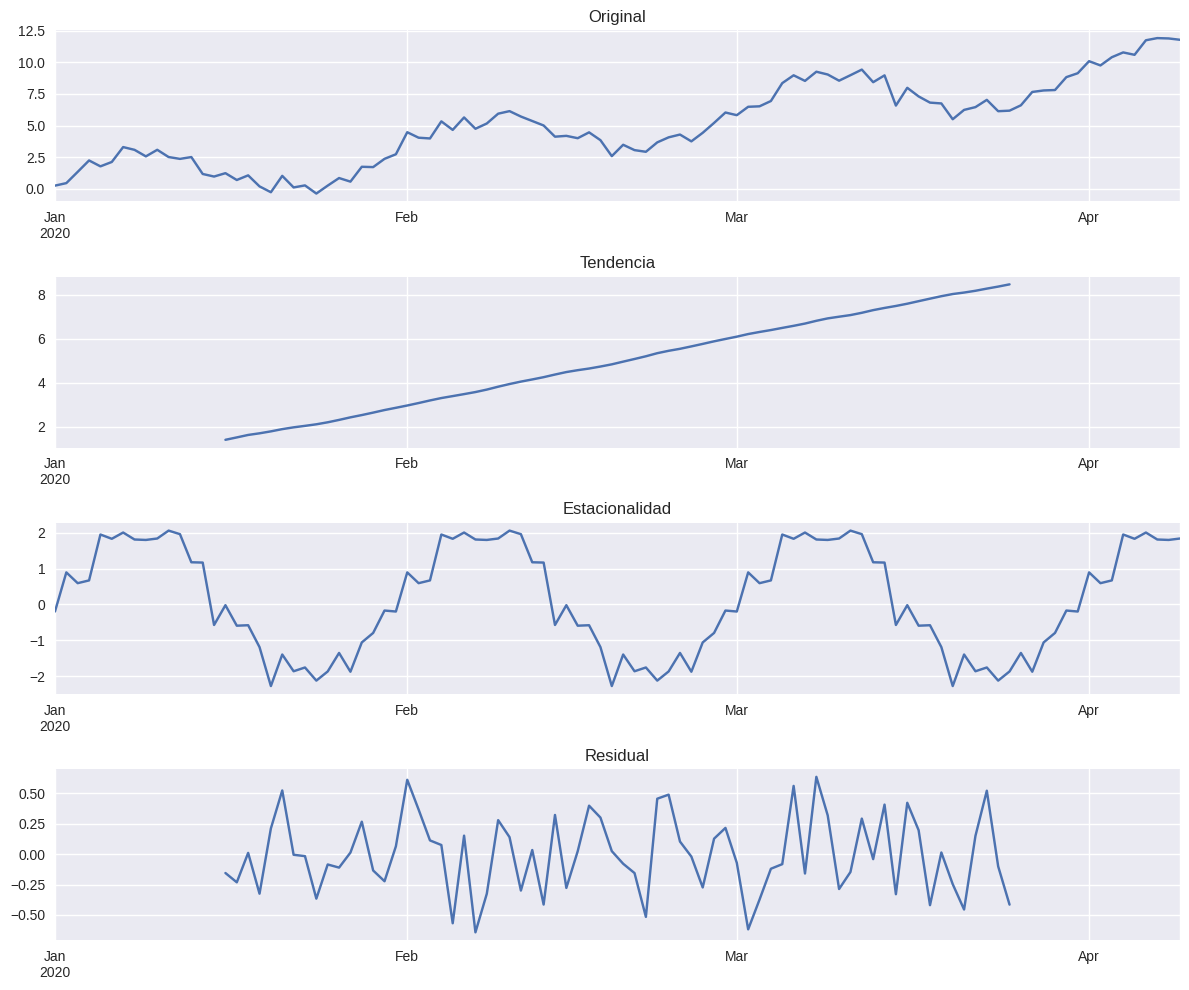

In [ ]:
# Descomposición de la serie
decomposition = seasonal_decompose(ts, model='additive', period=30)

fig, axes = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=axes[0], title='Original')
decomposition.trend.plot(ax=axes[1], title='Tendencia')
decomposition.seasonal.plot(ax=axes[2], title='Estacionalidad')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

# **Componente de tendencia**

Son movimientos o variaciones continuas de la variable de modo
uniforme y suave, por encima o por debajo, que se observan en el
largo plazo durante un periodo de longitud prolongada. Representan el comportamiento predominante o direccion general de la serie de
tiempo como ascendente o descendente.

**No lineal**

Crece poco al principio luego crecimiento rapido y por último se estabiliza.

**Lineal creciente o decreciente**
Aumenta o disminuye continuamente a traves del tiempo.

**Estacionaria o sin tendencia**

No presenta ni aumento ni disminucion.

**# Componente estacional**

Representa un movimiento periodico que se produce en forma similar cada año por la misma epoca, en correlacion con los meses o con las estaciones del año y aun con determinadas fechas.

# **Componente irregular o aleatorio**

Son aquellas variaciones producidas por sucesos de ocurrencia imprevisible o accidental que producen movimientos sin un patron discernible; así por ejemplo, las exportaciones de una empresa
pueden ser afectadas por sucesos inusuales no previsibles tales como huelgas, guerras, terremotos, inundaciones, etc. Estas variaciones irregulares son de corta duracion y de magnitud muy variable.

# OBJETIVO

Construir un modelo que describa de una manera sencilla la evolucion de una serie a traves del tiempo.

Asumamos que \begin{align*} \text{ } & X_t\end{align*} es la serie observada y que esta puede
 expresarse como una funcion de las componentes de TENDENCIA \begin{align*} \text{ } & T_t\end{align*}
CICLICA
\begin{align*} \text{ } & C_t\end{align*}

ESTACIONAL
\begin{align*} \text{ } & E_t\end{align*}

IRREGULAR

\begin{align*} \text{ } & A_t\end{align*}

◮ MODELOS ADITIVOS: \begin{align*} \text{ } & X_t = T_t + C_t+ E_t + A_t \end{align*}

◮ MODELOS Multiplicativos:

- Puro \begin{align*} \text{} & X_t = T_t * C_t* E_t * A_t \end{align*}

- Mixto \begin{align*} \text{} & X_t = T_t * C_t* E_t + A_t \end{align*}


MEDIDAS ESTADISTICAS ESTANDAR

1. Error Medio

 \begin{align*} \text{} &ME = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \end{align*}

2. Error Absoluto Medio

 \begin{align*} \text{} &MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|) \end{align*}

3. Error cuadrático medio

 \begin{align*} \text{} &MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \end{align*}

4. Raiz del error cuadrático medio

 \begin{align*} \text{} &RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} \end{align*}

5. Error porcentual absoluto medio

 \begin{align*} \text{} &MAPE = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|) \end{align*}
i es el dato actual para un periodo de tiempo i
y
Fi es el
´
pronostico (o valor ajustado) para el mismo periodo entonces el error
es definido como:

In [ ]:
def calculate_metrics(y_true, y_pred):
    """Calcular métricas de error"""
    errors = y_true - y_pred

    metrics = {
        'ME': np.mean(errors),
        'MAE': np.mean(np.abs(errors)),
        'MSE': np.mean(errors**2),
        'RMSE': np.sqrt(np.mean(errors**2)),
        'MAPE': np.mean(np.abs(errors / y_true)) * 100
    }
    return metrics

# Ejemplo de cálculo
y_true = np.array([22, 23, 39, 37, 38, 47, 43, 49, 61, 63])
y_pred = np.array([24, 28, 32, 36, 40, 44, 48, 52, 56, 60 ])

metrics = calculate_metrics(y_true, y_pred)
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")


ME: 0.20
MAE: 3.60
MSE: 16.00
RMSE: 4.00
MAPE: 9.38


In [ ]:
print(y_true - y_pred)

[-2 -5  7  1 -2  3 -5 -3  5  3]


In [10]:
!pip install yfinance

In [24]:
import yfinance as yf
tickers="EC"
data=yf.download(tickers=tickers,period="1y", interval="1d",
                 auto_adjust=True, prepost=True)["Close"].dropna()


[*********************100%***********************]  1 of 1 completed


In [25]:
len(data)

251

In [27]:
data["index"]=np.arange(1,len(data)+1)

In [28]:
data.head()

Ticker,EC,index
Date,,
2024-11-26,7.200381,1
2024-11-27,7.254519,2
2024-11-29,7.245496,3
2024-12-02,7.155266,4
2024-12-03,7.191358,5


In [16]:
len(data)

30

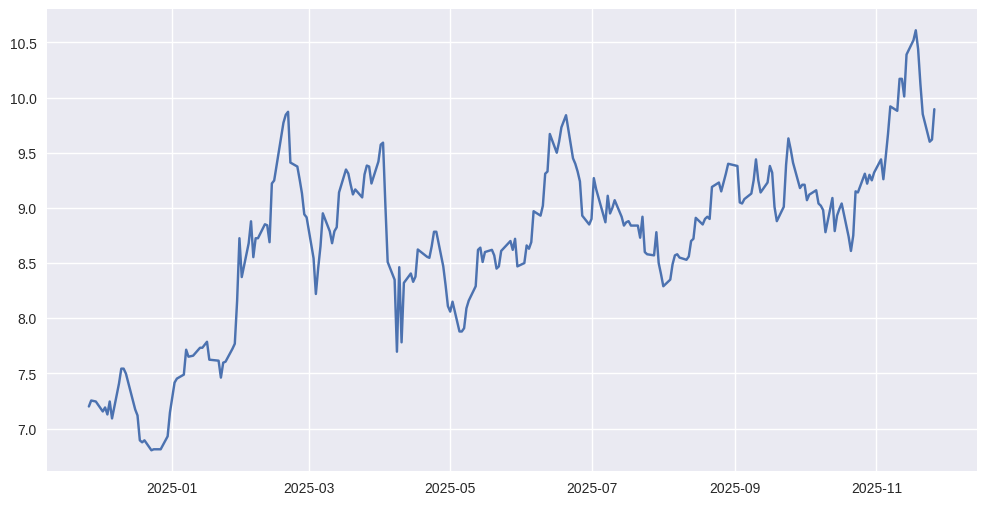

In [30]:
#grafico de serie de tiempo de data

plt.figure(figsize=(12, 6))
plt.plot(data['EC'])

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

X=data["index"].values.reshape(-1, 1)
y=data["EC"].values
modelorl= LinearRegression()
modelorl.fit(X, y)
y_pred = modelorl.predict(X)

#Parametros del modelo
pendiente = modelorl.coef_[0]
intercepto = modelorl.intercept_

# Estadisticos del modelo
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

    # 6. Estadísticas adicionales
n = len(y)
correlacion = np.corrcoef(X.flatten(), y)[0, 1]

print("="*50)
print("REGRESIÓN LINEAL SIMPLE")
print("="*50)
print(f"Número de observaciones: {n}")
print("\nECUACIÓN DE REGRESIÓN:")
print(f"Y = {intercepto:.4f} + {pendiente:.4f} * X")
print(f"\nMÉTRICAS DEL MODELO:")
print(f"R² (Coeficiente de determinación): {r2:.4f}")
print(f"Correlación (r): {correlacion:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")

REGRESIÓN LINEAL SIMPLE
Número de observaciones: 251

ECUACIÓN DE REGRESIÓN:
Y = 7.7628 + 0.0076 * X

MÉTRICAS DEL MODELO:
R² (Coeficiente de determinación): 0.4986
Correlación (r): 0.7061
MSE (Error Cuadrático Medio): 0.3027
RMSE (Raíz del Error Cuadrático Medio): 0.5502


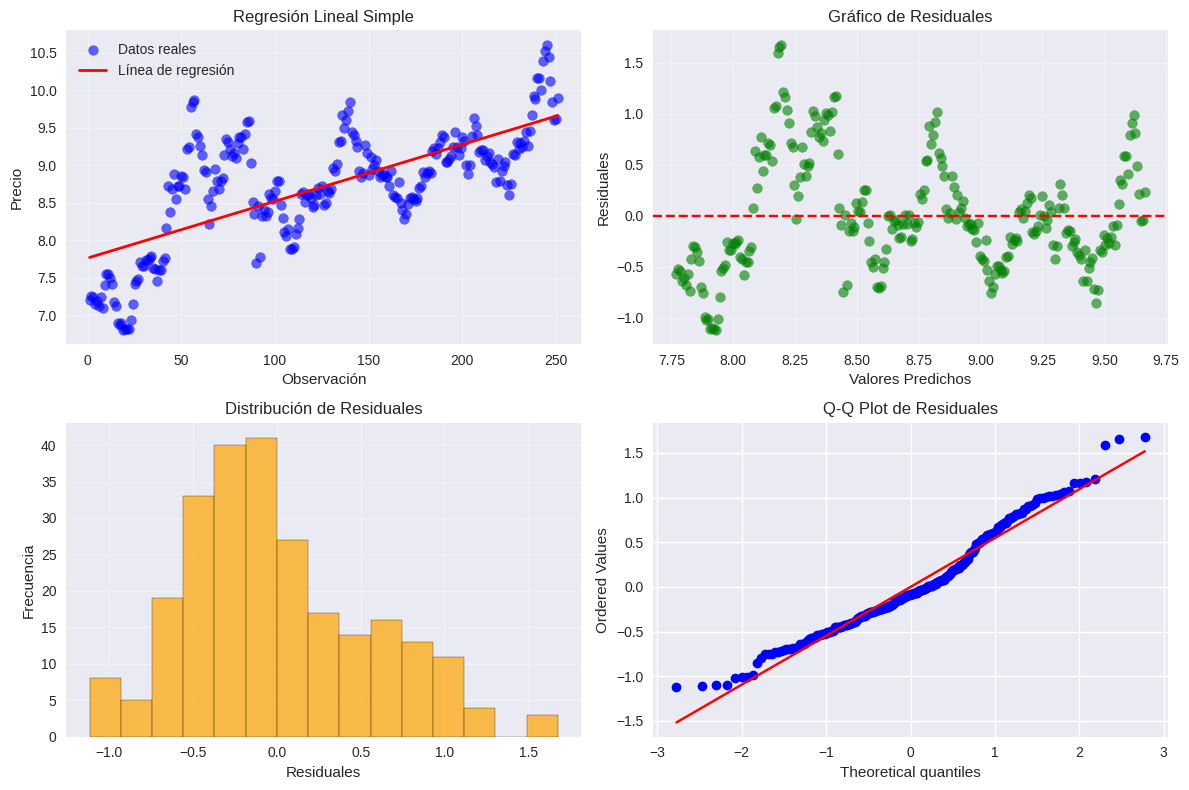

In [69]:
 #Graficas del Modelo
plt.figure(figsize=(12, 8))

# Gráfico de dispersión con línea de regresión
plt.subplot(2, 2, 1)
plt.scatter(X, y, alpha=0.6, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title('Regresión Lineal Simple')
plt.xlabel('Observación')
plt.ylabel('Precio')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico de residuales
residuos = y - y_pred
plt.subplot(2, 2, 2)
plt.scatter(y_pred, residuos, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales')
plt.grid(True, alpha=0.3)

# Histograma de residuales
plt.subplot(2, 2, 3)
plt.hist(residuos, bins=15, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuales')
plt.grid(True, alpha=0.3)

# Q-Q plot para normalidad
plt.subplot(2, 2, 4)
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuales')

plt.tight_layout()
plt.show()

In [102]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Calcular media móvil de 3 periodos
data['EC_MA3'] = data['EC'].rolling(window=3).mean().shift(1).dropna()

# Preparar datos (eliminar NaN)
datos_ma3 = data.dropna(subset=['EC_MA3'])

# The 'predictions' are now the moving average values themselves
y_pred_ma = datos_ma3['EC_MA3'].values

# Align the original 'EC' values with the length of the moving average data
y_original_aligned = datos_ma3['EC'].values

# Parámetros y métricas
# In this direct moving average approach, there are no 'pendiente' or 'intercepto' from a regression model
# However, we can still calculate R2 and RMSE by comparing the MA to the original data

r2 = r2_score(y_original_aligned, y_pred_ma)
rmse = np.sqrt(mean_squared_error(y_original_aligned, y_pred_ma))

print("="*50)
print("ESTRATEGIA PREDICTORIA: MEDIA MÓVIL (3 PERIODOS)")
print("="*50)
print(f"El pronóstico es directamente la Media Móvil de 3 períodos.")
print(f"\nMÉTRICAS DE RENDIMIENTO (vs. valores originales alineados):")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Observaciones: {len(y_original_aligned)}")

ESTRATEGIA PREDICTORIA: MEDIA MÓVIL (3 PERIODOS)
El pronóstico es directamente la Media Móvil de 3 períodos.

MÉTRICAS DE RENDIMIENTO (vs. valores originales alineados):
R²: 0.8955
RMSE: 0.2471
Observaciones: 248


In [103]:
data

Ticker,EC,index,EC_MA3
Date,,,
2024-11-26,7.200381,1,NaN
2024-11-27,7.254519,2,NaN
2024-11-29,7.245496,3,NaN
2024-12-02,7.155266,4,7.233466
2024-12-03,7.191358,5,7.218427
...,...,...,...
2025-11-20,10.120000,247,10.523333
2025-11-21,9.850000,248,10.390000
2025-11-24,9.600000,249,10.136667


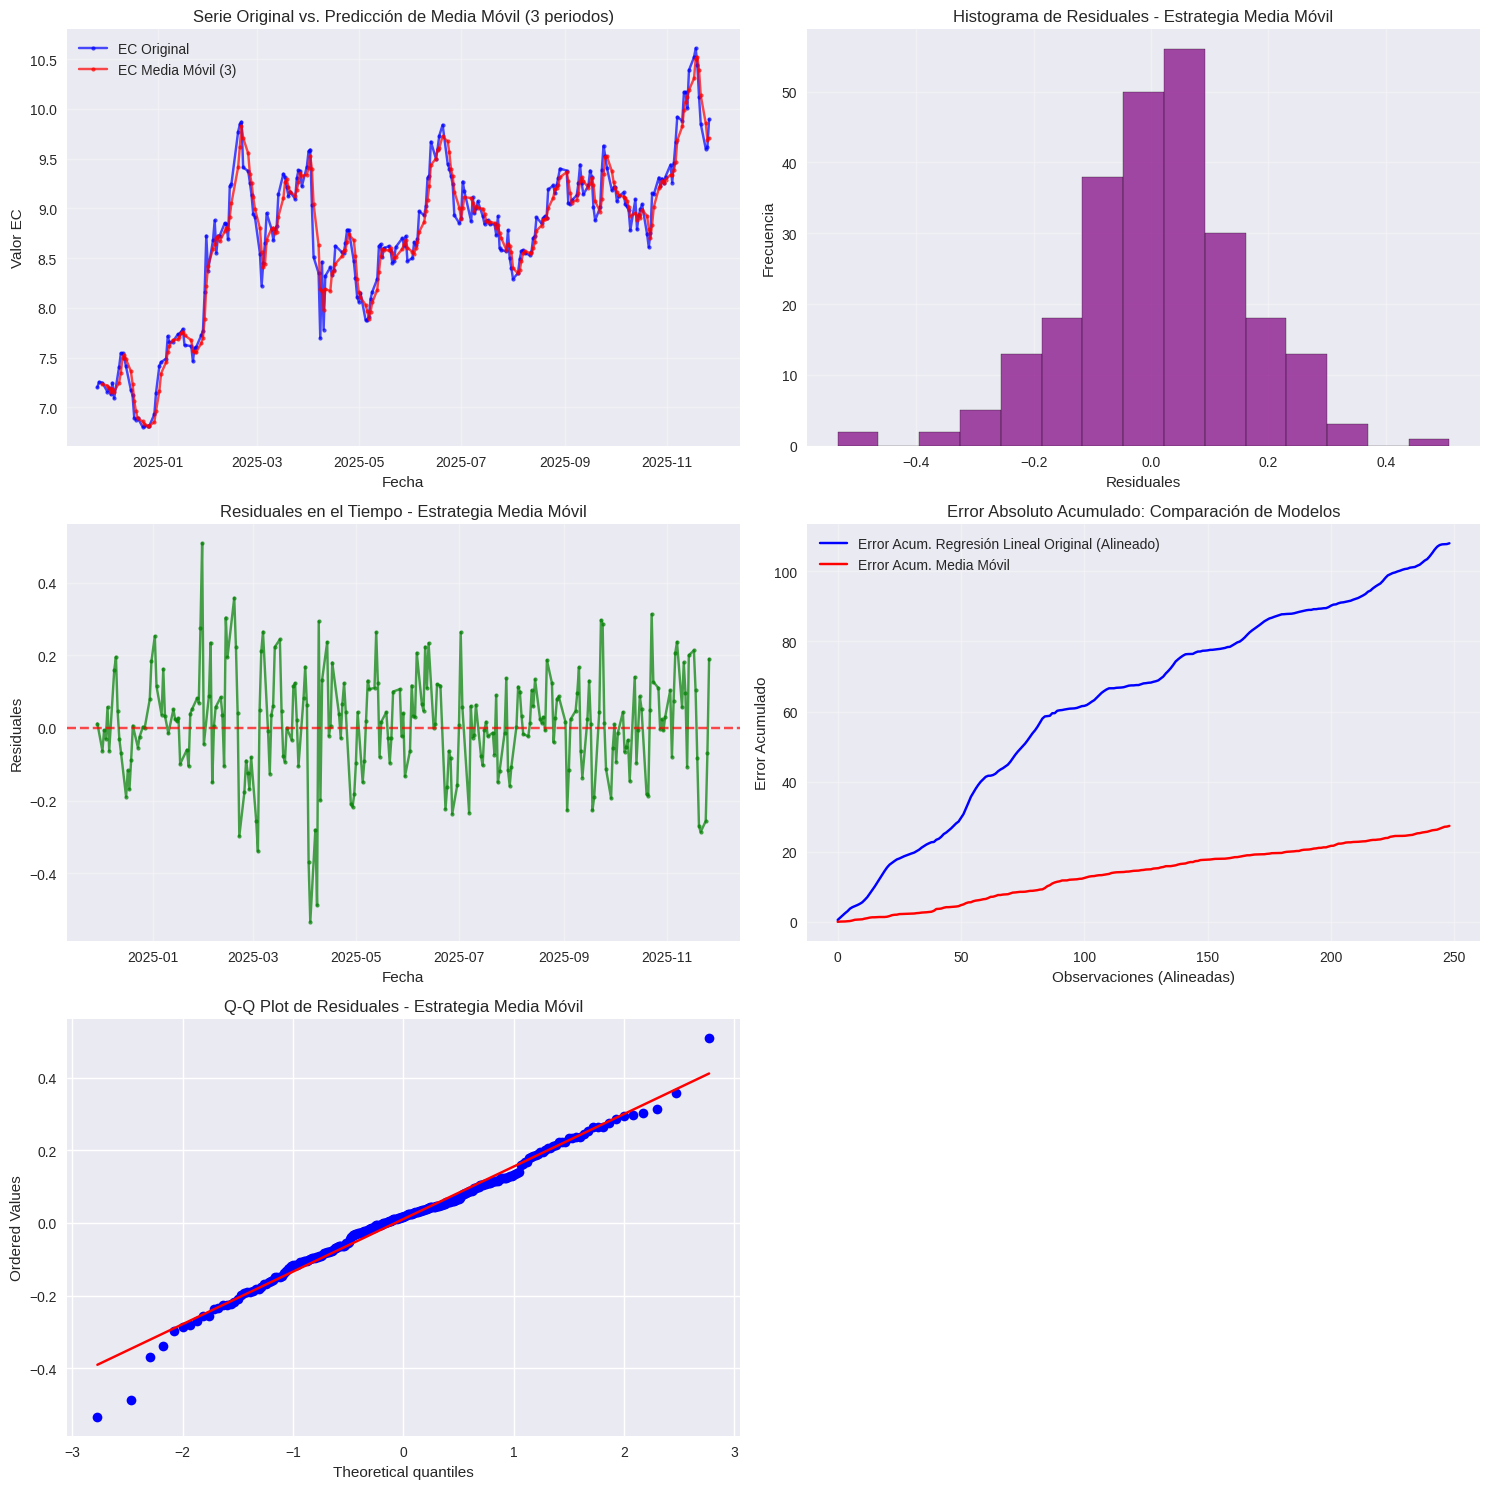

In [101]:
# Gráficas del Modelo de Media Móvil Predictoria
plt.figure(figsize=(15, 15)) # Increased figure size to accommodate 5 plots

# Gráfico 1: Serie original vs Media móvil
plt.subplot(3, 2, 1) # Changed to 3x2 grid
plt.plot(data.index, data['EC'], 'bo-', alpha=0.7, label='EC Original', markersize=3)
plt.plot(data.index, data['EC_MA3'], 'ro-', alpha=0.7, label='EC Media Móvil (3)', markersize=3)
plt.title('Serie Original vs. Predicción de Media Móvil (3 periodos)')
plt.xlabel('Fecha')
plt.ylabel('Valor EC')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Histograma de Residuales (Media Móvil)
residuals_ma3 = y_original_aligned - y_pred_ma # Recalculate residuals if not already defined for this specific use
plt.subplot(3, 2, 2) # Changed to 3x2 grid
plt.hist(residuals_ma3, bins=15, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuales - Estrategia Media Móvil')
plt.grid(True, alpha=0.3)

# Gráfico 3: Residuales en el tiempo (Media Móvil)
# residuals_ma3 is already calculated above
plt.subplot(3, 2, 3) # Changed to 3x2 grid
plt.plot(datos_ma3.index, residuals_ma3, 'go-', alpha=0.7, markersize=3)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.title('Residuales en el Tiempo - Estrategia Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Residuales')
plt.grid(True, alpha=0.3)

# Gráfico 4: Comparación de ajustes (Errores Acumulados)
plt.subplot(3, 2, 4) # Changed to 3x2 grid

# 'residuos' is from the first linear regression (cell mLtdRN8E82mV), its length is 251.
# 'residuals_ma3' has length 249 (since the first two values of EC_MA3 are NaN).
# To compare, we should slice the original residuals to align with the MA3 data.
# datos_ma3 starts at data.index[2], so we should slice 'residuos' from index 2.
residuals_original_aligned = residuos[2:]

# Calculate cumulative absolute errors
error_acum_original = np.cumsum(np.abs(residuals_original_aligned))
error_acum_ma3 = np.cumsum(np.abs(residuals_ma3))

# Both arrays should now have the same length (249)
plt.plot(range(len(error_acum_original)), error_acum_original, 'b-', label='Error Acum. Regresión Lineal Original (Alineado)')
plt.plot(range(len(error_acum_ma3)), error_acum_ma3, 'r-', label='Error Acum. Media Móvil')
plt.title('Error Absoluto Acumulado: Comparación de Modelos')
plt.xlabel('Observaciones (Alineadas)')
plt.ylabel('Error Acumulado')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 5: Q-Q plot de Residuales (Media Móvil)
plt.subplot(3, 2, 5) # New subplot for Q-Q plot
stats.probplot(residuals_ma3, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuales - Estrategia Media Móvil')

plt.tight_layout()
plt.show()

In [128]:

plt.show()

In [158]:
alpha = 0.1 # Coeficiente de suavizamiento (puedes ajustar este valor)
initial_k_points = 8 # Puedes ajustar esto para 'mean_k_points' strategy

# Eliminar columnas existentes si existen para asegurar un reinicio limpio
for col in ['EC_Suavizado', 'EC_Pronostico', 'Error_Pronostico']:
    if col in data.columns:
        data = data.drop(columns=[col])

# Aplicar la función flexible de Suavizamiento Exponencial Simple
ses_forecast_series, ses_metrics = simple_exponential_smoothing_flexible(
    series=data['EC'],
    alpha_val=alpha,
    initial_level_strategy='first_value', # O 'mean_k_points'
    initial_k_points=initial_k_points
)

# Añadir el pronóstico al DataFrame
data['EC_Pronostico'] = ses_forecast_series

# Calcular los errores para el pronóstico
data['Error_Pronostico'] = data['EC'] - data['EC_Pronostico']

# Mostrar resultados
print("="*50)
print("MODELO DE SUAVIZAMIENTO EXPONENCIAL SIMPLE (Clásico)")
print("="*50)
print(f"Coeficiente Alpha: {alpha:.2f}")
print(f"Estrategia de Inicialización: {'mean_k_points' if initial_k_points > 1 else 'first_value'}")
print(f"Puntos Iniciales para S0: {initial_k_points}")
for metric, value in ses_metrics.items():
    print(f"{metric}: {value:.4f}")
print(f"Número de observaciones para métricas: {len(ses_metrics['ME']) if isinstance(ses_metrics['ME'], np.ndarray) else (len(data['EC']) - 1) }") # Adjust for correct count after dropping first forecast

display(data.head())

MODELO DE SUAVIZAMIENTO EXPONENCIAL SIMPLE (Clásico)
Coeficiente Alpha: 0.10
Estrategia de Inicialización: mean_k_points
Puntos Iniciales para S0: 8
ME: 0.1060
MAE: 0.3081
MSE: 0.1593
RMSE: 0.3991
R2: 0.7332
MAPE: 3.5137
Número de observaciones para métricas: 250


Ticker,EC,index,EC_MA3,EC_SES_Forecast,EC_Pronostico,Error_Pronostico
Date,,,,,,
2024-11-26,7.200381,1,NaN,NaN,NaN,NaN
2024-11-27,7.254519,2,NaN,7.209404,7.200381,0.054138
2024-11-29,7.245496,3,NaN,7.218427,7.205795,0.039701
2024-12-02,7.155266,4,7.233466,7.223841,7.209765,-0.054499
2024-12-03,7.191358,5,7.218427,7.210126,7.204315,-0.012958


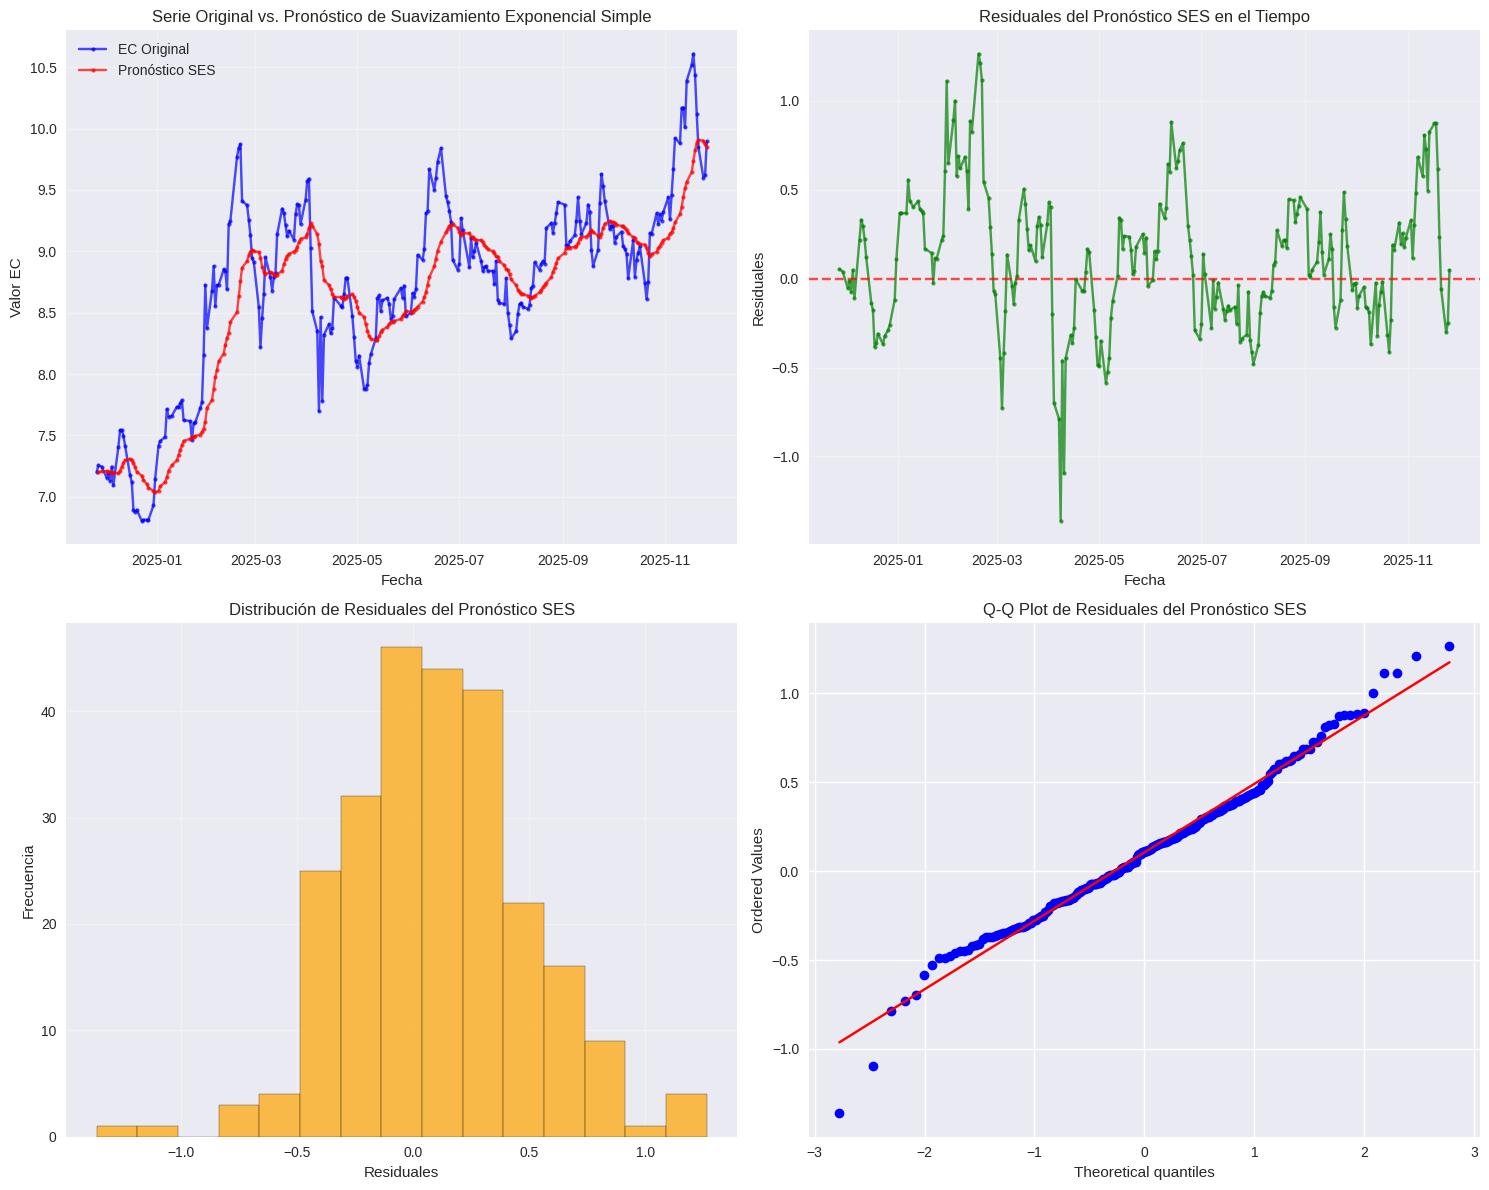

In [159]:
# Gráficas del Modelo de Suavizamiento Exponencial Simple
plt.figure(figsize=(15, 12))

# Gráfico 1: Serie Original vs. Pronóstico
plt.subplot(2, 2, 1)
plt.plot(data.index, data['EC'], 'bo-', alpha=0.7, label='EC Original', markersize=3)
plt.plot(data.index, data['EC_Pronostico'], 'ro-', alpha=0.7, label='Pronóstico SES', markersize=3)
plt.title('Serie Original vs. Pronóstico de Suavizamiento Exponencial Simple')
plt.xlabel('Fecha')
plt.ylabel('Valor EC')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Residuales en el tiempo
# Ensure to drop NaN values from residuals for plotting
valid_residuals = data['Error_Pronostico'].dropna()
valid_residuals_index = data.loc[valid_residuals.index].index

plt.subplot(2, 2, 2)
plt.plot(valid_residuals_index, valid_residuals, 'go-', alpha=0.7, markersize=3)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7)
plt.title('Residuales del Pronóstico SES en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Residuales')
plt.grid(True, alpha=0.3)

# Gráfico 3: Histograma de Residuales
plt.subplot(2, 2, 3)
plt.hist(valid_residuals, bins=15, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuales del Pronóstico SES')
plt.grid(True, alpha=0.3)

# Gráfico 4: Q-Q plot para normalidad de los Residuales
plt.subplot(2, 2, 4)
stats.probplot(valid_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuales del Pronóstico SES')

plt.tight_layout()
plt.show()

In [127]:
data

Ticker,EC,index,EC_MA3,EC_Suavizado,EC_Pronostico,Error_Pronostico
Date,,,,,,
2024-11-26,7.200381,1,NaN,7.200381,NaN,NaN
2024-11-27,7.254519,2,NaN,7.243692,7.200381,0.054138
2024-11-29,7.245496,3,NaN,7.245135,7.252354,-0.006858
2024-12-02,7.155266,4,7.233466,7.173240,7.245424,-0.090158
2024-12-03,7.191358,5,7.218427,7.187734,7.158861,0.032497
...,...,...,...,...,...,...
2025-11-20,10.120000,247,10.523333,10.189760,10.445759,-0.325760
2025-11-21,9.850000,248,10.390000,9.917952,10.133952,-0.283951
2025-11-24,9.600000,249,10.136667,9.663591,9.863591,-0.263590
